Majorana Qubit Simulation

 a single logical qubit in a Majorana system is encoded into 4 majorana modes where |0> and |1> correspond to even/odd fermion parity states of the Majoranas and the logical states are non locally encoded making them robust to local errors
 for N qubits, we need 2N+2 majoranas

We are going to build a Hadamard, Phase, and CNOT gate

First, we are going to showcase a simple implementation of qubit algebra as we learned in class

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [46]:
#construct the Pauli matrices and identity
X = np.array([[0,1], [1,0]], dtype=complex)
Y = np.array([[0,-1j], [1j,0]], dtype=complex)
Z = np.array ([[1,0], [0,-1]], dtype=complex)
I = np.eye(2, dtype=complex)

def apply_gate(state,gate):
    return gate @ state #matrix multiplier

In [47]:
# Qubit starting at|0>
myqubit = np.array([1,0], dtype=complex) 

In [48]:
#phase gate - this is similar to the result of braiding two majorana fermions
S = np.array([[1,0],[0,1j]])

#hadamard gate
H = (1/np.sqrt(2)) * np.array([[1,1],[1,-1]])

In [49]:
#simple algebraic quantum simulator...
state = apply_gate(myqubit, H)
print("applying hadamard", state)

applying hadamard [0.70710678+0.j 0.70710678+0.j]


Majorana Algebra

In [50]:
# We take g_i and g_j as the gamma products... matrices acting on a 2d qubit space and we will represent majoranas using pauli matrices

# matrix multiplication can occasionally lead to some errors, so I did a simpler operation
gamma12 = 1j * Z # gamma1 * gamma2 = iZ
gamma23 = 1j * X # gamma2 * gamma3 = iX
gamma13 = -1j * Y # gamma1 * gamma3 = -iY

#braiding operator U12 similar to an S gate
def braiding_operator(gamma_product):
    theta = np.pi / 4
    return np.cos(theta) * I - np.sin(theta) * gamma_product
U_12 = braiding_operator(gamma12)
U_23 = braiding_operator(gamma23)
U_13 = braiding_operator(gamma13)

state_after_U12 = apply_gate(myqubit,U_12)
print("braided state of U_12 |0>", state_after_U12)

#Construct a braided hadamard
U_H = U_23 @ U_12 @ U_23
braided_hadamard = apply_gate(myqubit, U_H)
print("braided state after hadamard", braided_hadamard)

reapply = apply_gate(braided_hadamard, U_H)
print("reapplying hadamard", reapply)
reapply = apply_gate(reapply, U_H)
print("reapplying hadamard", reapply)
reapply = apply_gate(reapply, U_H)
print("reapplying hadamard", reapply)

braided state of U_12 |0> [0.70710678-0.70710678j 0.        +0.j        ]
braided state after hadamard [0.-0.70710678j 0.-0.70710678j]
reapplying hadamard [-1.+0.j  0.+0.j]
reapplying hadamard [0.+0.70710678j 0.+0.70710678j]
reapplying hadamard [1.+0.j 0.+0.j]


In [ ]:
from functools import reduce

#jordan wigner mapping
def gamma_map(index, total_qubits):
    # index 1 is gamma1, index 2 is gamma 2 and so on
    q = (index + 1) // 2  # qubit number - finds which qubit the majorana operator belongs to
    op = X if index % 2 == 1 else Y  # odd index = X, even index = Y
    prefix = [Z] * (q - 1)           # jordan wigner string - Z operator on every qubit before the current qubit to maintain fermionic anticommutation
    # q = 3 would be Z * Z
    paulis = prefix + [op] + [I] * (total_qubits - q) # take the prefix of Z's, then the even or odd X/Y, then the identity 
    return reduce(np.kron, paulis) #applies kronecker product to all of the matrices in the pauli operator list

def braiding_multiple(gamma_i, gamma_j):
    theta = np.pi / 4
    gamma_product = gamma_i @ gamma_j
    dim = gamma_i.shape[0] # need to get the matrix dimension
    return np.cos(theta) * np.eye(dim) - np.sin(theta) * gamma_product * (1/sqrt(2))


In [59]:
#2qubit state
base1 = np.array([1, 0, 0, 0], dtype=complex)
base2 = np.array([0, 1, 0, 0], dtype=complex)
base3 = np.array([0, 0, 1, 0], dtype=complex)
base4 = np.array([0, 0, 0, 1], dtype=complex)

# Get Majoranas
gamma1 = gamma_map(1, 2)
gamma2 = gamma_map(2, 2)
gamma3 = 1j * np.kron(Z, X) # found an error gamma map cannot be used for cnot gates
gamma4 = 1j * np.kron(Z, Y)

print("gamma3", gamma3)
print("gamma4", gamma4)
#check that gamma_3*gamma4 + gamma_4*gamma_3 = 0
value = gamma3@gamma4 + gamma4@gamma3
print("check that gamma_3*gamma4 + gamma_4*gamma_3 = 0... we get", value)
print("")


U_34 = braiding_multiple(gamma3,gamma4)
print("U34", U_34)
H_2 = np.kron(I,H) #hadamard on qubit 2
CNOT = H_2 @ U_34 @ H_2
CNOT1 = apply_gate(base1,CNOT)
CNOT2 = apply_gate(base2,CNOT)
CNOT3 = apply_gate(base3,CNOT)
CNOT4 = apply_gate(base4,CNOT)

print("result of applying CNOT1 gate", CNOT1)
print("result of applying CNOT2 gate", CNOT2)
print("result of applying CNOT3 gate", CNOT3)
print("result of applying CNOT4 gate", CNOT4)

gamma3 [[ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j -0.-1.j -0.+0.j]]
gamma4 [[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j -0.+0.j]]
check that gamma_3*gamma4 + gamma_4*gamma_3 = 0... we get [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

U34 [[0.70710678+0.70710678j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.70710678-0.70710678j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.70710678+0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.70710678-0.70710678j]]
result of applying CNOT1 gate [0.70710678+0.j         0.        +0.70710678j 0.        +0.j
 0.        +0.j        ]
result of applying CNOT2 gate [0. 

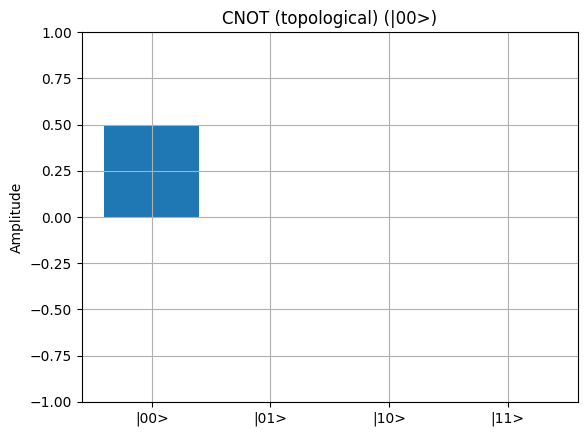

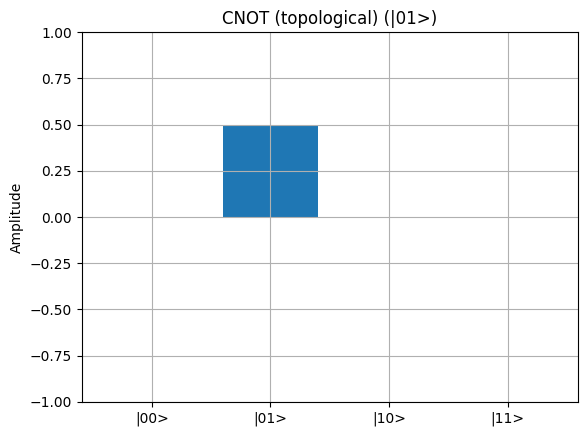

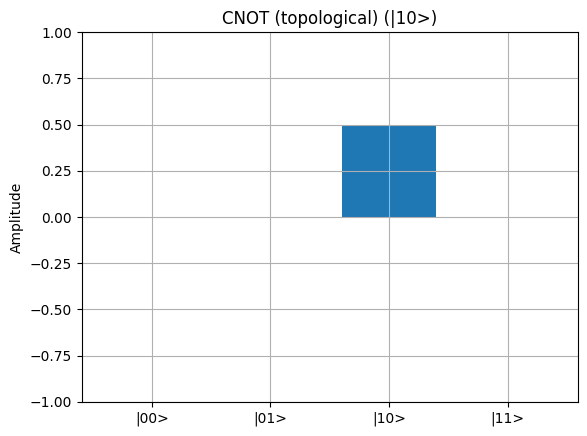

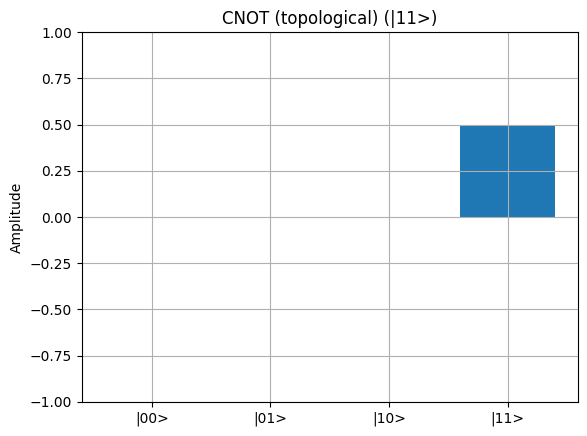

In [53]:
basis_labels = ['|00>', '|01>', '|10>', '|11>']

def plot_state_amplitudes(state, title):
    fig, ax = plt.subplots()
    real_parts = state.real
    ax.bar(basis_labels, real_parts)
    ax.set_ylim(-1, 1)
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    plt.grid(True)
    plt.show()
    
plot_state_amplitudes(CNOT1, 'CNOT (topological) (|00>)')
plot_state_amplitudes(CNOT2, 'CNOT (topological) (|01>)')
plot_state_amplitudes(CNOT3, 'CNOT (topological) (|10>)')
plot_state_amplitudes(CNOT4, 'CNOT (topological) (|11>)')

We see the demonstration of the limits of braiding only computation here which creates superposition

C:\Users\joeyh\AppData\Local\Temp\ipykernel_25368\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


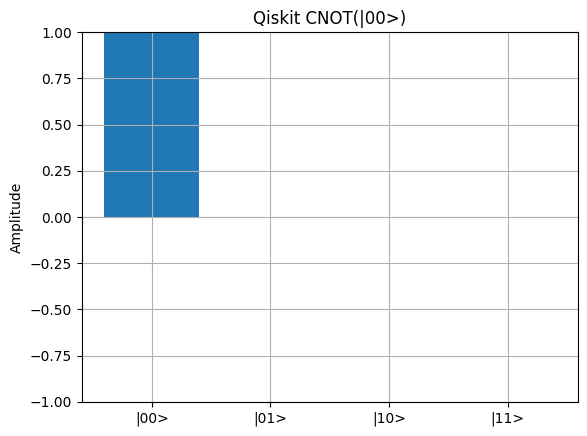

C:\Users\joeyh\AppData\Local\Temp\ipykernel_25368\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


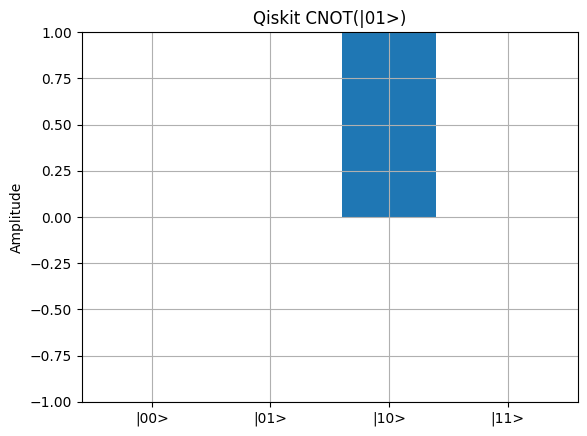

C:\Users\joeyh\AppData\Local\Temp\ipykernel_25368\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


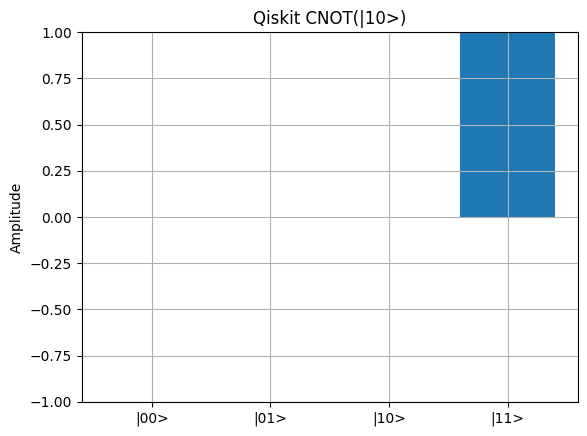

C:\Users\joeyh\AppData\Local\Temp\ipykernel_25368\2325045260.py:5: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  real_parts = state.real


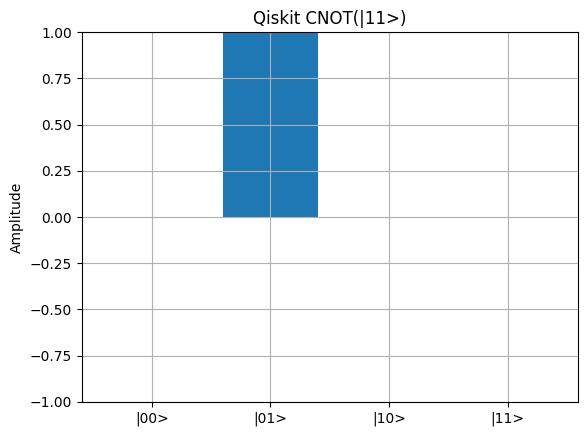

In [54]:
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator
from qiskit.quantum_info import Statevector

def qiskit_cnot(input_state_label):
    qc = QuantumCircuit(2) #2 qubit system

    # defining the basis states
    if input_state_label == '|01>':
        qc.x(1) #pauli x gate
    elif input_state_label == '|10>':
        qc.x(0)
    elif input_state_label == '|11>':
        qc.x(0)
        qc.x(1)

    # Apply CNOT with first qubit as control and target second
    qc.cx(0, 1)

    simulator = StatevectorSimulator() #using state vector simulator for backend
    result = simulator.run(qc).result()
    final_state = result.get_statevector()
    return final_state

for label in basis_labels:
    state = qiskit_cnot(label)
    plot_state_amplitudes(state, f'Qiskit CNOT({label})')

Grover's Algorithm Qiskit

{'11': 750, '10': 63, '00': 71, '01': 116}


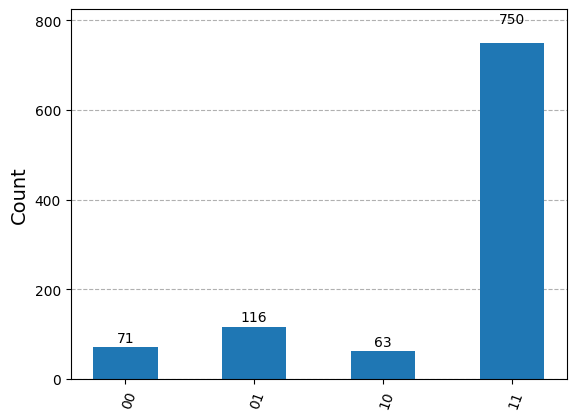

In [57]:
from qiskit import QuantumCircuit, transpile
import qiskit_aer.noise as noise
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

#building the circuit and the gates
grover = QuantumCircuit(2)
grover.h([0, 1])
grover.cz(0, 1)
grover.h([0, 1])
grover.x([0, 1])
grover.h(1)
grover.cx(0, 1)
grover.h(1)
grover.x([0, 1])
grover.h([0, 1])

grover.measure_all()
grover.draw()

noise_model = noise.NoiseModel()
error_prob = 0.05
depolarizing = noise.depolarizing_error(error_prob, 1)

# adding noise to the gates used
noise_model.add_all_qubit_quantum_error(depolarizing, ['u1', 'u2', 'u3', 'h', 'x'])

cnot_error = noise.depolarizing_error(0.1, 2)  # adding a 10% error to cnot
noise_model.add_all_qubit_quantum_error(cnot_error, ['cx'])
backend_noisy = AerSimulator(noise_model=noise_model)
# ;combine grover with noise
t_grover = transpile(grover, backend_noisy)

# simulate
result = backend_noisy.run(t_grover, shots=1000).result()
%matplotlib inline

# look at results
counts = result.get_counts()
print(counts)
plot_histogram(counts)
plt.show()

Braiding topological Grover's

In [69]:
#need all kronecker products for two qubits (Pauli matrices defined earlier)
IX = np.kron(I, X)
IY = np.kron(I, Y)
IZ = np.kron(I, Z)
XI = np.kron(X, I)
YI = np.kron(Y, I)
ZI = np.kron(Z, I)

#we will redefine gammas just to maintain consistency
gamma1 = XI
gamma2 = YI
gamma3 = IX
gamma4 = IY
gamma5 = -1j * ZI @ IX
gamma6 = -1j * ZI @ IY
gamma7 = -1j * IZ @ XI
gamma8 = -1j * IZ @ IY

def hadamard_braid(qubit=0):
    if qubit == 0:
        U1 = braiding_multiple(gamma1,gamma2) #braid 1st two majoranas X rotation
        U2=braiding_multiple(gamma1,gamma3) #braid another Z rotation
        U3 = braiding_multiple(gamma2,gamma3) #braid a third phase correction
        return U3 @ U2 @ U1
    else:
        U4 = braiding_multiple(gamma3,gamma4)
        U5 = braiding_multiple(gamma3,gamma5)
        U6 = braiding_multiple(gamma4,gamma5)
        return U6 @ U5 @ U4

# start at |00>
state = np.array([1, 0, 0, 0], dtype=complex)
#make gates
H0 = np.kron(H, I)
H1 = np.kron(I, H)
X0 = np.kron(X, I)
X1 = np.kron(I, X)
CZ = braiding_multiple(gamma2,gamma3)

state = apply_gate(state,H0)
state = apply_gate(state,H1) #hadamard both

state = apply_gate(state,CZ) #cz state
print("should be |11>: ", state)

state = apply_gate(state,H0)
state = apply_gate(state,H1) #hadamard again

# apply pauli X gates
state = apply_gate(state, X0)
state = apply_gate(state, X1)
print("after first pauli x gate: ", state)

state = apply_gate(state, CZ) #cz again
print("after second cz gate: ", state)

state = apply_gate(state, X0) #X gate again
state = apply_gate(state, X1)
print("after second x gate: ", state)

state = apply_gate(state, H0)
state = apply_gate(state, H1) #final hadamard

print("Grover State: ", state)


should be |11>:  [0.35355339+0.35355339j 0.35355339+0.35355339j 0.35355339-0.35355339j
 0.35355339-0.35355339j]
after first pauli x gate:  [ 0.00000000e+00+0.00000000e+00j -1.58187870e-17+7.07106781e-01j
  0.00000000e+00+0.00000000e+00j  7.07106781e-01-1.58187870e-17j]
after second cz gate:  [ 1.11855716e-17+5.00000000e-01j -1.11855716e-17+5.00000000e-01j
  5.00000000e-01+1.11855716e-17j  5.00000000e-01-1.11855716e-17j]
after second x gate:  [ 5.00000000e-01-1.11855716e-17j  5.00000000e-01+1.11855716e-17j
 -1.11855716e-17+5.00000000e-01j  1.11855716e-17+5.00000000e-01j]
Grover State:  [0.5+5.00000000e-01j 0. -2.77555756e-17j 0.5-5.00000000e-01j
 0. -2.77555756e-17j]
